Hi Chukwuemeka! My name is Dmitry, I will be reviewing your project.

I’ve left my comments throughout the notebook - look for green, yellow and red boxes! Please don’t delete these comments.

<div class="alert alert-success">
<b>Reviewer's comment</b>
<p>Success: everything is done well</p>
</div>

<div class="alert alert-warning">
<b>Reviewer's comment</b>
<p>Remarks: my recommendations to make the project even better</p>
</div>

<div class="alert alert-danger">
<b>Reviewer's comment</b>
<p>Error: some issues need fixing!</p>
</div>

<span style="color:red"> Keep in mind that the project will be accepted only when all the “red” issues are resolved.</span>

You can add your replies or questions related to my comments using this template:
<div class="alert alert-info">
<b>Student's comment</b>
</div>

### General feedback - V1
- Thank you for submitting such a nice project!


- There are plently of things you've done great, here is what I liked most:
    - Well-structured project with conclusions added after each step makes a very good impression and improves readability for both professional analysts and unqualified people who might be reading your report in real life
    - You have some good examples of automatization throughout the project
    - I appreciate you taking an extra step to clean the data from outliers - although not explicitly required in this project, it can help us to get a more unbiased result
    - It's good that you look at both histograms and density distributions when studying the customers behavior - I would have done it the same way 👍
    - The statistical analysis is also done right, although the inputs to it should be corrected (see next point)


- There are a couple of important issues that need to be solved for you to arrive to correct conclusions in the end:
    - The most important is the choice of data points for the analysis. If I understand correctly, you have chosen to study total usages and revenues for each user in 2018, so you have 500 data points before removing outliers. This approach, however, ignores the fact that some users were registered for the calling plan longer than others. Instead, you should study monthly revenues from users of the two plans: **a data point should be revenue from one user in one month**, and it doesn't matter for us what user that is, or what month that is. Basically, that will give you 500\*12 data points, excluding the months before registration or after churn (so, probably much less data points, but you get the point). Since this affects a big part of the project, I will not add comments about it in the main body, but only here.
    - Please, use the same approach when studying customers behavior in terms of number of calls, messages, internet volume. Again, a data point would be consumption by one user in one month, and it doesn't matter which user it is.
    - I've noticed that in revenue calculation you have hard-coded numbers describing the included volumes and prices in the plans. It's better to automatize this by reading those values from "plans" dataframe - assume that this dataframe is supplied to you by someone else, and your code should work correctly if that dataframe gets updated (for example, if the prices are increased)


- Don't forget to update the conclusions after making changes!
- I've left some other comments throughout the text, but in general the project is in a very good shape and I have no doubt you'll make it perfect by the next iteration. Good luck!

# Telecom prepaid plan analytics

A telecom operator Megaline is looking at using insights from analytics to make adjustments in advertising budget. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

As a Data analyst working for the telecom operator Megaline, you are required to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze clients' behavior and determine which prepaid plan brings in more revenue.

**Prepaid plans description**

**Surf**
- Monthly charge: \$20
- 500 monthly minutes, 50 texts and 15 GB of data
- After exceeding the package limits: 
  - 1 minute: 3 cents ("Megaline" always rounds up the minute and megabyte values. If the call lasted just one second, it will be counted as one minute)
  - 1 text message: 3 cents
  - 1 GB of data: \$10.

**Ultimate**
- Monthly charge: $70
- 3000 monthly minutes, 1000 text messages, and 30 GB of data
- After exceeding the package limits: 
  - 1 minute: 1 cent
  - 1 text messgae: 1 cent
  - 1 GB of web traffic: \$7.

# Objectives

The objective of this project is to:
- Analyze clients' behavior and determine which prepaid plans brings in more revenue
- Use analytics to assists the comercial department in making adjustment in advertising budget
- Apply Statistical Data Analysis to a real-life analytical case study.

<div class="alert alert-warning">
<b>Reviewer's comment</b>
<p>It's good if you rephrase introduction in your own words, in the same style as your conclusions. That way the project will look more like a researcher's report than a student's work :)</p>
</div>

<hr>

 # Table of contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#open_the_data">Open the data file and study the general information</a></li>
        <li><a href="#data_preparation">Prepare the data</a></li>
        <li><a href="#analyze_data">Analyze the data</a></li>
        <li><a href="#test_hypothesis">Test the hypothesis</a></li>
        <li><a href="#overall_conclusion">Overall conclusion</a></li>
    </ol>
</div>
<br>
<hr>

<div id="open_the_data">
    <h2>Open the data file and study the general information</h2> 
</div>

We require the following libraries: *numpy* and *pandas* for data preprocessing and manipulation, *matplotlib* and *seaborn* for visualization, *math* for factorial calculation, *scipy* for statistical analysis.

In [335]:
# import pandas and numpy for data preprocessing and manipulation
import numpy as np
import pandas as pd
import re 
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

# matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# seaborn for statistical data visualization
import seaborn as sns

# import the math and scipy packages for statistical analysis
import math as mt
from math import factorial
from scipy import stats as st

# import datetime package
from datetime import datetime

import warnings
warnings.filterwarnings(action='ignore', category=np.VisibleDeprecationWarning) 

print('Project libraries has been successfully been imported!')

Project libraries has been successfully been imported!


In [336]:
# read the data
try:
    users = pd.read_csv('https://code.s3.yandex.net/datasets/megaline_users1.csv')
    calls = pd.read_csv('https://code.s3.yandex.net/datasets/megaline_calls.csv')
    messages = pd.read_csv('https://code.s3.yandex.net/datasets/megaline_messages.csv')
    internet = pd.read_csv('https://code.s3.yandex.net/datasets/megaline_internet.csv')
    plans = pd.read_csv('https://code.s3.yandex.net/datasets/megaline_plans.csv')
except:
    users = pd.read_csv('C:/Users/hotty/Desktop/Practicum by Yandex/Projects/Statistical Data Analysis/Data/megaline_users1.csv')
    calls = pd.read_csv('C:/Users/hotty/Desktop/Practicum by Yandex/Projects/Statistical Data Analysis/Data/megaline_calls.csv')
    messages = pd.read_csv('C:/Users/hotty/Desktop/Practicum by Yandex/Projects/Statistical Data Analysis/Data/megaline_messages.csv')
    internet = pd.read_csv('C:/Users/hotty/Desktop/Practicum by Yandex/Projects/Statistical Data Analysis/Data/megaline_internet.csv')
    plans = pd.read_csv('C:/Users/hotty/Desktop/Practicum by Yandex/Projects/Statistical Data Analysis/Data/megaline_plans.csv')
print('Data has been read correctly!')

Data has been read correctly!


In [337]:
# function to determine if columns in file have null values
def get_percent_of_na(df, num):
    count = 0
    df = df.copy()
    s = (df.isna().sum() / df.shape[0])
    for column, percent in zip(s.index, s.values):
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count += 1
        print('Column {} has {:.{}%} percent of Nulls, and {} of nulls'.format(column, percent, num, num_of_nulls))
    if count != 0:
        print("\033[1m" + 'There are {} columns with NA.'.format(count) + "\033[0m")
    else:
        print()
        print("\033[1m" + 'There are no columns with NA.' + "\033[0m")
        
# function to display general information about the dataset
def get_info(df):
    print("\033[1m" + '-'*100 + "\033[0m")
    print('Head:')
    print()
    display(df.head())
    print('-'*100)
    print('Info:')
    print()
    display(df.info())
    print('-'*100)
    print('Describe:')
    print()
    display(df.describe())
    print('-'*100)
    display(df.describe(include='object'))
    print()
    print('Columns with nulls:')
    display(get_percent_of_na(df, 4))  # check this out
    print('-'*100)
    print('Shape:')
    print(df.shape)
    print('-'*100)
    print('Duplicated:')
    print("\033[1m" + 'We have {} duplicated rows.\n'.format(df.duplicated().sum()) + "\033[0m")
    print()

In [338]:
# study the general information about the dataset 
print('General information about the `calls` dataframe')
get_info(calls)

print('General information about the `users` dataframe')
get_info(users)

print('General information about the `messages` dataframe')
get_info(messages)

print('General information about the `internet` dataframe')
get_info(internet)

print('General information about the `plans` dataframe')
get_info(plans)

General information about the `calls` dataframe
----------------------------------------------------------------------------------------------------
Head:



,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


None

----------------------------------------------------------------------------------------------------
Describe:



,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


----------------------------------------------------------------------------------------------------


,id,call_date
count,137735,137735
unique,137735,351
top,1048_212,2018-12-27
freq,1,1091



Columns with nulls:

There are no columns with NA.


None

----------------------------------------------------------------------------------------------------
Shape:
(137735, 4)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows.


General information about the `users` dataframe
----------------------------------------------------------------------------------------------------
Head:



,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

----------------------------------------------------------------------------------------------------
Describe:



,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


----------------------------------------------------------------------------------------------------


,first_name,last_name,city,reg_date,tariff,churn_date
count,500,500,500,500,500,34
unique,458,399,73,266,2,29
top,Jasper,Reese,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-12,surf,2018-12-18
freq,3,3,80,5,339,3



Columns with nulls:
Column churn_date has 93.2000% percent of Nulls, and 466 of nulls
There are 1 columns with NA.


None

----------------------------------------------------------------------------------------------------
Shape:
(500, 8)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows.


General information about the `messages` dataframe
----------------------------------------------------------------------------------------------------
Head:



,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


None

----------------------------------------------------------------------------------------------------
Describe:



,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


----------------------------------------------------------------------------------------------------


,id,message_date
count,76051,76051
unique,76051,351
top,1416_100,2018-12-28
freq,1,702



Columns with nulls:

There are no columns with NA.


None

----------------------------------------------------------------------------------------------------
Shape:
(76051, 3)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows.


General information about the `internet` dataframe
----------------------------------------------------------------------------------------------------
Head:



,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


None

----------------------------------------------------------------------------------------------------
Describe:



,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


----------------------------------------------------------------------------------------------------


,id,session_date
count,104825,104825
unique,104825,351
top,1336_422,2018-12-24
freq,1,851



Columns with nulls:

There are no columns with NA.


None

----------------------------------------------------------------------------------------------------
Shape:
(104825, 4)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows.


General information about the `plans` dataframe
----------------------------------------------------------------------------------------------------
Head:



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
plan_name                2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


None

----------------------------------------------------------------------------------------------------
Describe:



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


----------------------------------------------------------------------------------------------------


,plan_name
count,2
unique,2
top,surf
freq,1



Columns with nulls:

There are no columns with NA.


None

----------------------------------------------------------------------------------------------------
Shape:
(2, 8)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows.




### Conclusion

From the general information about the dataset, we can see that the dataset contains different data with different datatype. One of the problems identified while looking through the data is that some columns have the wrong datatype. We would need to change datatypes to the right format. For instance, *call_date* in the `calls` dataframe needs to be changed to datetime, *reg_date* and *churn_date* in the `users` need to be changed to datetime, *message_date* in the `messages` needs to be changed to datetime, *session_date* in the `internet` needs to be changed to datetime. We would also need to check for missing values, carry out some data preprocessing, and data type replacement. 

<div class="alert alert-success">
<b>Reviewer's comment</b>
<p>Correct!</p>
</div>

<div id="data_preparation">
    <h2>Prepare the data</h2> 
</div>

#### Convert data to the necessary types

In [339]:
# apply numpy vectorizing to id
get_id = np.vectorize(lambda x: re.sub('.*_', '' ,  x))

In [340]:
# change date type to datetime and split into day, month and year
def new_date_features(df):
    columns = df.columns.tolist()
    idx = [columns.index(x) for x in columns if 'date' in x][0]
    
    df[columns[idx]] = pd.to_datetime(df[columns[idx]])
    df['day'] = df[columns[idx]].dt.day_name()
    df['month'] = df[columns[idx]].dt.month_name()
    df['year'] = df[columns[idx]].dt.year
    return df    

##### Prepare Call Data

From the general information about the `calls` dataframe, we can see that there is no null values in the dataframe. We proceed to convert datatypes in the `calls` dataframe. By inspecting the `calls` data, we identified another problem with the data. Some data in the `duration` column has values greater than 0 but less than 1 minutes. For such values, we would be rounding up `duration` less than 1 minutes to 1 minutes.

In [341]:
# change the `calls_date` to datetime datatype
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')
calls['id'] = get_id(calls['id'])
calls = new_date_features(calls)
calls['call type'] = np.where(calls['duration'] == 0, 'Missed call', 'Connected call')
calls.head()

,id,user_id,call_date,duration,day,month,year,call type
0,93,1000,2018-12-27,8.52,Thursday,December,2018,Connected call
1,145,1000,2018-12-27,13.66,Thursday,December,2018,Connected call
2,247,1000,2018-12-27,14.48,Thursday,December,2018,Connected call
3,309,1000,2018-12-28,5.76,Friday,December,2018,Connected call
4,380,1000,2018-12-30,4.22,Sunday,December,2018,Connected call


In [342]:
# check and round all call duration
calls['duration'] = (
    calls['duration'].apply(np.ceil).astype('int64')
)

# rename columns
calls.columns = ['id', 'user', 'call date', 'duration', 'day', 'month', 'year', 'call type']
calls.head() 

,id,user,call date,duration,day,month,year,call type
0,93,1000,2018-12-27,9,Thursday,December,2018,Connected call
1,145,1000,2018-12-27,14,Thursday,December,2018,Connected call
2,247,1000,2018-12-27,15,Thursday,December,2018,Connected call
3,309,1000,2018-12-28,6,Friday,December,2018,Connected call
4,380,1000,2018-12-30,5,Sunday,December,2018,Connected call


<div class="alert alert-danger">
<b>Reviewer's comment</b>
<p>Call duration should be rounded up for all calls, not only the 1s ones. From project description: "For calls, <b>each individual call</b> is rounded up: even if the call lasted just one second, it will be counted as one minute".</p>
Also, the calls that lasted 0s should *not* be rounded up to 1: these are missed calls and they are not charged. 
</div>


<div class="alert alert-info">
<b>Student's comment</b>
<p>Done!!!</p>
</div>


##### Prepare User Data

We look at the `user` dataframe by checking for null values and change datatype in this dataframe. Another error we noticed is in the `churn_date` column where 466 values is missing. This large portion of missing values in the `churn_date` field will be transformed into either churn ='Yes' or no churn = 'No', thus it can be analyzed as a categorical variable.

In [343]:
# check for null values
users.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
tariff          0
churn_date    466
dtype: int64

In [344]:
# change the `reg_date` in the `users` to datetime
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')

# change the `churn date` to datetime
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')
users.columns = ['user', 'first name', 'last name', 'age', 'city', 'subscription date', 'plan', 'churn date']

# create categorical variable for whether customer churn or not
users['customer churn'] = np.where(users['churn date'].isnull(), 'No', 'Yes')
users.head() 

,user,first name,last name,age,city,subscription date,plan,churn date,customer churn
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,No
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,No
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,No
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,No
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,No


<div class="alert alert-warning">
<b>Reviewer's comment</b>
    <p>For customers who didn't terminate the plan, you can set December 31st, 2018 as churn date, because we only consider 2018 in this project. Make sure that you don't count the revenue before registration or after churn date - there may be errors in data!</p>
</div>


We look at the `messages`, `internet` and `plans`. We need to change datatype to datetime, and rename the columns.

##### Prepare Message Data

In [345]:
# change the `message_date` in the `messages` to datetime
#messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')
messages['id'] = get_id(messages['id'])
messages = new_date_features(messages)
messages.columns = ['id', 'user', 'message date', 'day', 'month', 'year']
messages.head()

,id,user,message date,day,month,year
0,125,1000,2018-12-27,Thursday,December,2018
1,160,1000,2018-12-31,Monday,December,2018
2,223,1000,2018-12-31,Monday,December,2018
3,251,1000,2018-12-27,Thursday,December,2018
4,255,1000,2018-12-26,Wednesday,December,2018


##### Prepare Internet Data

In [346]:
# change the `session_date` in `internet` to datetime
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')
internet['id'] = get_id(internet['id'])
internet = new_date_features(internet)
internet.columns = ['id', 'user', 'session date', 'data used', 'day', 'month', 'year'] # rename columns
internet.head()

,id,user,session date,data used,day,month,year
0,13,1000,2018-12-29,89.86,Saturday,December,2018
1,204,1000,2018-12-31,0.00,Monday,December,2018
2,379,1000,2018-12-28,660.40,Friday,December,2018
3,413,1000,2018-12-26,270.99,Wednesday,December,2018
4,442,1000,2018-12-27,880.22,Thursday,December,2018


In [347]:
# rename `plans` columns
plans.columns = ['messages included', 'data volume per month', 'minutes included', 'monthly fee', 'price per gb', 'price per message', 'price per minute', 'plan']
plans.head()

,messages included,data volume per month,minutes included,monthly fee,price per gb,price per message,price per minute,plan
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


#### Conclusion

We identified the problem with the datatype in earlier section. In this section, we fixed some of the problems identifies. One of the problems identified in the dataset is that the *subscription date*, *churn date* in the `users` dataframe, *call date* in the `calls` dataframe, *message date* in the `messages` dataframe, and *session date* in the `internet` dataframe are of datatype object. We converted this datatype to datetime datatype. We also rounded up each individual calls. In addition, we created a new column in the `users` dataframe to show whether a customer churn or not.

#### Make calculations

Using the new dataframe we now have, we can find for each user:
- The number of calls made and minutes used per month
- The number of text messages sent per month
- The volume of data per month
- The monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan)

In [348]:
# check if all users are accounted for in other tables
print(calls['user'].nunique())
print(users['user'].nunique())
print(messages['user'].nunique())
print(internet['user'].nunique())

481
500
402
489


In [349]:
# function to display tables side by side for analysis
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h6>{title}</h6>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [350]:
# calls per user per month
calls_per_month = calls.groupby(['user', 'month']).agg({'id': 'count'}).rename(columns={'id': 'calls made'})#.reset_index()
display_side_by_side(calls_per_month.head(), calls_per_month.describe(), titles=[
    'Head of calls per month', 'Describe calls per month'])

# minutes per user per month
mins_per_month = calls.groupby(['user', 'month']).agg({'duration': 'sum'}).rename(columns={'duration': 'minutes spent'})
display_side_by_side(mins_per_month.head(), mins_per_month.describe(), titles=[
    'Head of minutes per month', 'Describe minutes per month'])

Head of calls per month 
 
 
 
 
 calls made 
 
 
 user 
 month 
 
 
 
 
 
 1000 
 December 
 16 
 
 
 1001 
 August 
 27 
 
 
 December 
 56 
 
 
 November 
 64 
 
 
 October 
 65 
 
 
 Describe calls per month 
 
 
 
 calls made 
 
 
 
 
 count 
 2258.000000 
 
 
 mean 
 60.998671 
 
 
 std 
 31.770869 
 
 
 min 
 1.000000 
 
 
 25% 
 39.000000 
 
 
 50% 
 60.000000 
 
 
 75% 
 80.000000 
 
 
 max 
 205.000000

Head of minutes per month 
 
 
 
 
 minutes spent 
 
 
 user 
 month 
 
 
 
 
 
 1000 
 December 
 124 
 
 
 1001 
 August 
 182 
 
 
 December 
 412 
 
 
 November 
 426 
 
 
 October 
 393 
 
 
 Describe minutes per month 
 
 
 
 minutes spent 
 
 
 
 
 count 
 2258.000000 
 
 
 mean 
 435.937555 
 
 
 std 
 231.972343 
 
 
 min 
 0.000000 
 
 
 25% 
 275.000000 
 
 
 50% 
 429.000000 
 
 
 75% 
 574.750000 
 
 
 max 
 1510.000000

From the number of calls made per month, we can see that about 1499 users made calls out of 2258 users. The person with the highest call rate made 205 calls and spent a total minute of 1510 minutes, while the person with the lowest call rate made just 1 calls with 0 minutes which could have even been a missed call. Since the mean of `minutes spent` is *greater* than the median, we expect the distribution to be skewed to the right. This means the data could contain outliers.

In [351]:
#messages per user per month
messages_per_month = messages.groupby(['user', 'month']).agg({'id': 'count'}).rename(columns={'id': 'messages sent'})
display_side_by_side(messages_per_month.head(), messages_per_month.describe(), titles=[
    'Head of messages per month', 'Describe messages per month'])

Head of messages per month 
 
 
 
 
 messages sent 
 
 
 user 
 month 
 
 
 
 
 
 1000 
 December 
 11 
 
 
 1001 
 August 
 30 
 
 
 December 
 44 
 
 
 November 
 36 
 
 
 October 
 53 
 
 
 Describe messages per month 
 
 
 
 messages sent 
 
 
 
 
 count 
 1806.000000 
 
 
 mean 
 42.110188 
 
 
 std 
 33.122931 
 
 
 min 
 1.000000 
 
 
 25% 
 17.000000 
 
 
 50% 
 34.000000 
 
 
 75% 
 59.000000 
 
 
 max 
 266.000000

On the average, about 1806 messages was sent per user per month. The least number of message sent was 1 while the most message sent was 266. Since the mean of `messages sent` is *greater* than the median, we expect the distribution to be skewed to the right. This means the data could contain outliers. 

In [352]:
# internet traffic per user per month
internet_per_month = (internet.groupby(['user', 'month']).agg({'data used': 'sum'})/1024).apply(np.ceil)*1024
display_side_by_side(internet_per_month.head(), internet_per_month.describe(), titles=[
    'Head of data used per month', 'Describe data used per month'])

Head of data used per month 
 
 
 
 
 data used 
 
 
 user 
 month 
 
 
 
 
 
 1000 
 December 
 2048.0 
 
 
 1001 
 August 
 7168.0 
 
 
 December 
 19456.0 
 
 
 November 
 19456.0 
 
 
 October 
 22528.0 
 
 
 Describe data used per month 
 
 
 
 data used 
 
 
 
 
 count 
 2277.000000 
 
 
 mean 
 17396.757137 
 
 
 std 
 7878.331628 
 
 
 min 
 1024.000000 
 
 
 25% 
 13312.000000 
 
 
 50% 
 17408.000000 
 
 
 75% 
 21504.000000 
 
 
 max 
 71680.000000

From the volume of internet data used per month, we can see that about 1499 users used data out of 2277 users. On the average, about 17,397MB of data was used. The person with the lowest data volume used $\approx$1024MB while the person with the most data usage used $\approx$71,680MB of data. Since the mean of `data volume` is slightly *lesser* than the median, we would expect the distribution to be skewed to the left. This means that the data could contain outliers. 

We will now proceed to combine the calculated values to obtain a new dataset.

In [353]:
# combine aggregates into one table
agg_df = pd.concat([calls_per_month, mins_per_month, messages_per_month, internet_per_month], axis=1).reset_index().fillna(0)
agg_df.columns = ['user', 'month', 'calls made', 'call duration', 'messages sent', 'mb used']
agg_df = agg_df.merge(users, on='user')
agg_df

,user,month,calls made,call duration,messages sent,mb used,first name,last name,age,city,subscription date,plan,churn date,customer churn
0,1000,December,16.0,124.0,11.0,2048.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,No
1,1001,August,27.0,182.0,30.0,7168.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,No
2,1001,December,56.0,412.0,44.0,19456.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,No
3,1001,November,64.0,426.0,36.0,19456.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,No
4,1001,October,65.0,393.0,53.0,22528.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,September,45.0,363.0,0.0,23552.0,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT,No
2289,1499,December,65.0,496.0,0.0,22528.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,No
2290,1499,November,45.0,308.0,0.0,17408.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,No
2291,1499,October,53.0,385.0,0.0,20480.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,No


We have been able to aggregate our data. We now have the number of calls per month, total minutes used per month, messages sent per month, volume of data per month, monthly plan, and volume of data in gigabytes. Now we have to calculate the monthly revenue from each user.

In [354]:
# aggregate data to the plan dataframe
agg_df = agg_df.merge(plans, left_on='plan', right_on='plan')
agg_df.head()

,user,month,calls made,call duration,messages sent,mb used,first name,last name,age,city,...,plan,churn date,customer churn,messages included,data volume per month,minutes included,monthly fee,price per gb,price per message,price per minute
0,1000,December,16.0,124.0,11.0,2048.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,ultimate,NaT,No,1000,30720,3000,70,7,0.01,0.01
1,1006,December,9.0,59.0,139.0,32768.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,ultimate,2018-12-18,Yes,1000,30720,3000,70,7,0.01,0.01
2,1006,November,2.0,10.0,15.0,3072.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,ultimate,2018-12-18,Yes,1000,30720,3000,70,7,0.01,0.01
3,1008,December,85.0,634.0,26.0,15360.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,ultimate,NaT,No,1000,30720,3000,70,7,0.01,0.01
4,1008,November,63.0,446.0,37.0,24576.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,ultimate,NaT,No,1000,30720,3000,70,7,0.01,0.01


In [355]:
# determine revenue from allowance and charges
agg_df['message cost'] = agg_df.apply(lambda x: max(0, x['messages sent'] - x['messages included']) * x['price per message'], 
                                      axis = 1)
agg_df['call cost'] = agg_df.apply(lambda x: max(0, x['call duration'] - x['minutes included']) * x['price per minute'], 
                                   axis = 1)
agg_df['gb cost'] = agg_df.apply(lambda x: np.ceil(max(0, x['mb used'] - x['data volume per month'])/1024)*x['price per gb'], 
                                axis = 1)
agg_df['revenue'] = agg_df['message cost'] + agg_df['call cost'] + agg_df['gb cost'] + agg_df['monthly fee']
agg_df.head()

,user,month,calls made,call duration,messages sent,mb used,first name,last name,age,city,...,data volume per month,minutes included,monthly fee,price per gb,price per message,price per minute,message cost,call cost,gb cost,revenue
0,1000,December,16.0,124.0,11.0,2048.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,30720,3000,70,7,0.01,0.01,0.0,0.0,0.0,70.0
1,1006,December,9.0,59.0,139.0,32768.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,30720,3000,70,7,0.01,0.01,0.0,0.0,14.0,84.0
2,1006,November,2.0,10.0,15.0,3072.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,30720,3000,70,7,0.01,0.01,0.0,0.0,0.0,70.0
3,1008,December,85.0,634.0,26.0,15360.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,30720,3000,70,7,0.01,0.01,0.0,0.0,0.0,70.0
4,1008,November,63.0,446.0,37.0,24576.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,30720,3000,70,7,0.01,0.01,0.0,0.0,0.0,70.0


<div class="alert alert-danger">
<b>Reviewer's comment</b>
<p>In the 2 cells above, try to avoid hard-coding the numbers - take them from "plans" dataframe instead.</p> 
</div>
<div class="alert alert-danger">
<b>Reviewer's comment</b>
<p>Revenue should be calculated for each month individually, not for usage summed over entire year.</p> 
</div>
<div class="alert alert-danger">
<b>Reviewer's comment</b>
<p>Also, make sure to round up number of gigabytes used per month.</p> 
</div>

<div class="alert alert-success">
<b>Reviewer's comment</b>
<p>But nice implementation with the functions! Another way to compute a function per row is to use .apply() method of pd.DataFrame. You can have something like data['revenue'] = data.apply(calc_revenue), and the first argument in the definiton of calc_revenue() will be a row of data. </p> 
</div>

In [356]:
# determine mean of revenue
print('The mean of the revenue is: {:.2f}'.format(agg_df['revenue'].mean()))

The mean of the revenue is: 64.35


#### Conclusion

At the end of this section, we have been able to prepare the data for analysis by first converting to the appropriate datatypes. We also found some errors in the data which was handled. One of the errors observed was that some data in the `duration` column has values greater than 0 but less than 1 minutes. For such values, we rounded up duration less than 1 minutes to 1 minutes. We transformed the large portion of missing values in the `churn_date` field into either churn ='Yes' or no churn = 'No', thus it can be analyzed as a categorical variable. We made some calculations, joined the data and computed the revenue. We determined the average revenue per month to be $64.35.

<div id="analyze_data">
    <h2>Analyze the data</h2> 
</div>

#### Carry out Exploratory Data Analysis

We begin by carrying out exploratory data analysis to describe the distribution of our data. 

In [357]:
# populate the list of numeric and categorical attributes
num_list = []
cat_list = []
plot_data = agg_df[['calls made', 'call duration', 'messages sent', 'mb used', 'plan', 'call cost', 'gb cost', 'message cost', 'revenue']]

for column in plot_data:
    if is_numeric_dtype(plot_data[column]):
        num_list.append(column)
    elif is_string_dtype(plot_data[column]):
        cat_list.append(column)
        
print(num_list)
print(cat_list)

['calls made', 'call duration', 'messages sent', 'mb used', 'call cost', 'gb cost', 'message cost', 'revenue']
['plan']


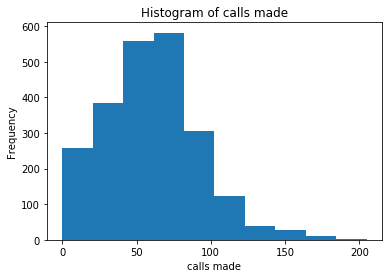

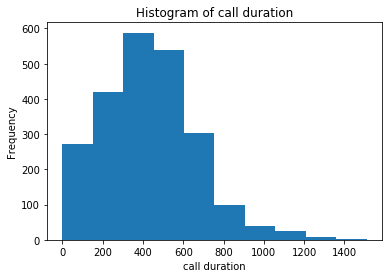

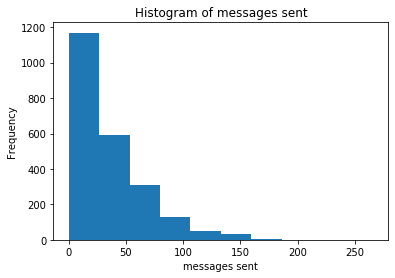

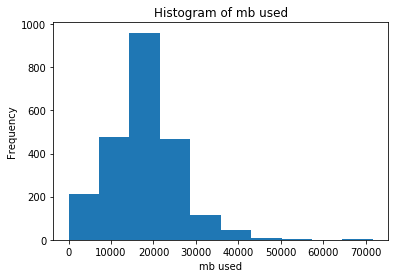

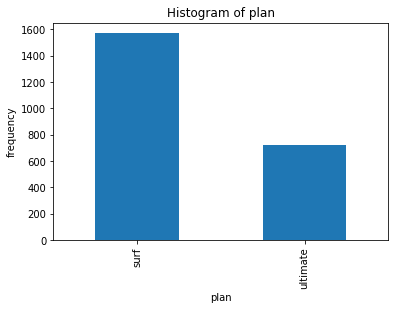

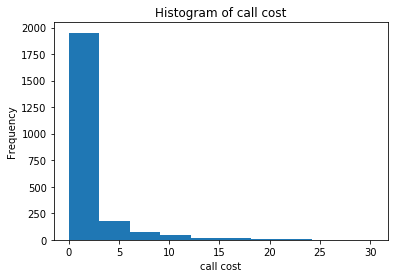

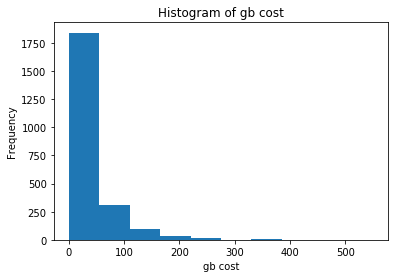

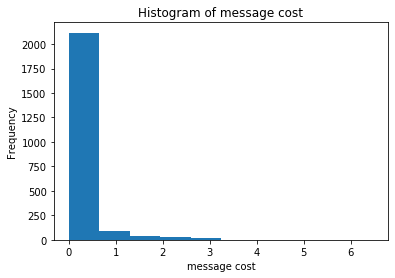

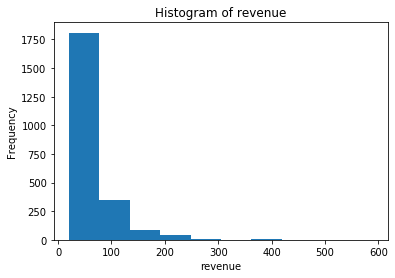

In [358]:
# create histogram and bar chart
for column in plot_data:
    plt.figure(column)
    plt.xlabel(column)
    plt.ylabel('frequency')
    plt.title('Histogram of ' + column)
    if is_numeric_dtype(plot_data[column]):
        agg_df[column].plot(kind = 'hist')
    elif is_string_dtype(plot_data[column]):
        agg_df[column].value_counts().plot(kind = 'bar')

#### Conclusion

We used a for loop to iterate through the columns in the data frame and create a plot for each column. We use a histogram to plot numerical variables and a bar plot for categorical variables. The plot above shows the frequency distribution of the features in our data. All the charts above with the exception of the `histogram of plan` show that the distribution is somewhat **skewed right**. In the histogram of messages sent, most messages sent is between 0 and 266. Since the *mean* is greater than the *median*, we can conclude that the data has some outliers. The minimum message sent is 0 and the maximum is 266 with a *standard deviation* of 34. This shows that we have outlier in this column since the *mean* at 33 is greater than the *median* at 26. The bar plot for the plan shows that surf had the most frequency than ultimate. This means more people used the surf plan than the ultimate plan. We need to further analyze the data to determine which plan brings in more revenue. Since the data is skewed, we would have to detect and remove outliers in the data.

#### Outlier detection and removal

We will determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue working with the filtered data. 

In [359]:
# upper limit of the outliers
telecom = agg_df[['calls made', 'call duration', 'messages sent', 'mb used', 'revenue']]
iqr = telecom.quantile(0.75) - telecom.quantile(0.25)
telecom_outliers_upper = telecom.quantile(0.75) + iqr*1.5
telecom_outliers_lower = telecom.quantile(0.25) - iqr*1.5
print('The inter-quartile range are - calls made: {}, call duration: {:.2f}, messages sent: {},  mb used: {:.2f}, and revenue: {:.2f}'.format(*iqr))
print()
print('The upper bound are - calls made: {}, call duration: {:.2f}, messages sent: {},  mb used: {:.2f}, and revenue: {:.2f}'.format(*telecom_outliers_upper))
print()
print('The lower bound are - calls made: {}, call duration: {:.2f}, messages sent: {},  mb used: {:.2f}, and revenue: {:.2f}'.format(*telecom_outliers_lower))

The inter-quartile range are - calls made: 41.0, call duration: 307.00, messages sent: 48.0,  mb used: 9216.00, and revenue: 46.52

The upper bound are - calls made: 140.5, call duration: 1032.50, messages sent: 123.0,  mb used: 35328.00, and revenue: 139.78

The lower bound are - calls made: -23.5, call duration: -195.50, messages sent: -69.0,  mb used: -1536.00, and revenue: -46.30


In [360]:
# import stats from scipy
from scipy import stats

# z-score for 'calls made', 'call duration', 'messages sent', 'mb used', 'revenue'
stats.zscore(telecom)

array([[-1.36030011, -1.29210377, -0.65075944, -1.90782275,  0.12118159],
       [-1.57637953, -1.56721445,  3.10702167,  1.94105774,  0.42151554],
       [-1.79245895, -1.77460558, -0.53332878, -1.77952673,  0.12118159],
       ...,
       [-0.46511394, -0.51332891, -0.97369375,  0.0166175 , -0.52239115],
       [-0.21816604, -0.18742856, -0.97369375,  0.40150554,  0.12118159],
       [-0.5885879 , -0.35249497, -0.97369375, -0.49656657, -0.95143964]])

In [361]:
# filtered dataset
telecom_filtered = telecom[(np.abs(stats.zscore(telecom)) < 3).all(axis=1)]
telecom_filtered = telecom_filtered.reset_index(drop=True, inplace=False)
telecom_filtered

,calls made,call duration,messages sent,mb used,revenue
0,16.0,124.0,11.0,2048.0,70.0
1,2.0,10.0,15.0,3072.0,70.0
2,85.0,634.0,26.0,15360.0,70.0
3,63.0,446.0,37.0,24576.0,70.0
4,71.0,476.0,21.0,17408.0,70.0
...,...,...,...,...,...
2186,45.0,363.0,0.0,23552.0,100.0
2187,65.0,496.0,0.0,22528.0,90.0
2188,45.0,308.0,0.0,17408.0,40.0
2189,53.0,385.0,0.0,20480.0,70.0


In [362]:
# describe the filtered data
telecom_filtered.describe()

,calls made,call duration,messages sent,mb used,revenue
count,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000
mean,58.340484,416.820630,30.577362,16677.506162,59.596919
std,30.152095,220.277704,29.843065,7130.831165,35.069814
min,0.000000,0.000000,0.000000,0.000000,20.000000
25%,37.000000,260.000000,3.000000,12288.000000,22.430000
50%,59.000000,418.000000,24.000000,17408.000000,70.000000
75%,78.000000,562.000000,49.000000,21504.000000,70.000000
max,155.000000,1131.000000,134.000000,40960.000000,201.830000


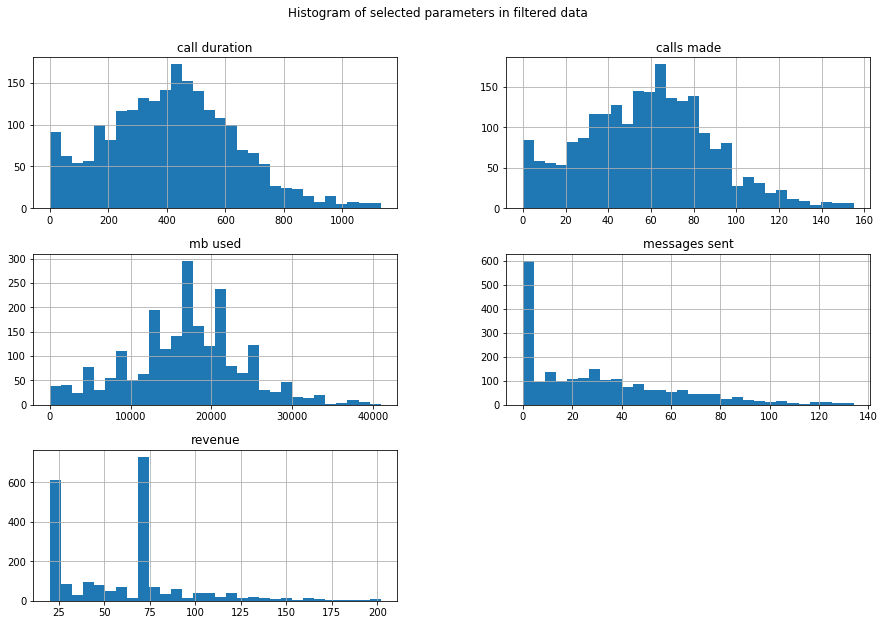

In [363]:
# plot histogram of filtered data
telecom_filtered[['calls made', 'call duration', 'messages sent', 'mb used', 'revenue']].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histogram of selected parameters in filtered data', y=0.95);

Before removing outliers, we had high values in the histogram of the data. After removing outliers using the Z-score technique, we observe from the histogram that the mean is closer to the median, and the distribution of the data is closer to a normal distribution than before.

#### Conclusion

We detected outlier in the data from the initial histogram plotted. We use the `stats` package in scipy to determine the Z-score and filter the data to obtain the distribution where the mean is 0 and the standard deviation is 1. We have successfully removed outliers from the data. By looking at the statistics of the filtered data, we can see that outliers have been removed.

#### Describe the customers' behavior

###### Find the minutes the users of each plan require per month

In [364]:
# minutes users of each plan require per month
agg_df.groupby('plan')['call duration'].agg([np.mean, np.var, np.std])

,mean,var,std
plan,,,
surf,428.749523,54968.279461,234.453150
ultimate,430.450000,57844.464812,240.508762


What's the difference in average monthly call duration for customers in the two plans?

In [365]:
# difference in average monthly call duration
agg_df.groupby('plan')['call duration']. describe()

,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,1573.0,428.749523,234.453150,0.0,272.0,425.0,576.00,1510.0
ultimate,720.0,430.450000,240.508762,0.0,260.0,424.0,565.25,1369.0


From the above calculation, we observe that the users in the ultimate plan spend more minutes per month than users in the surf plan. Let's see if we get the same result if we remove outliers in the data.

In [366]:
# extract filtered data for the ultimate plan
ultimate_data = agg_df.query("plan == 'ultimate'")
ultimate_plan = ultimate_data[['calls made', 'call duration', 'messages sent', 'mb used', 'revenue']]

ultimate_plan_filtered = ultimate_plan[(np.abs(stats.zscore(ultimate_plan)) < 3).all(axis=1)]
ultimate_plan_filtered = ultimate_plan_filtered.reset_index(drop=True, inplace=False)
ultimate_plan_filtered.describe()

,calls made,call duration,messages sent,mb used,revenue
count,677.000000,677.000000,677.000000,677.000000,677.000000
mean,58.970458,418.196455,34.302806,16877.093058,70.568685
std,29.979860,216.700769,31.274291,6916.348803,3.677063
min,0.000000,0.000000,0.000000,0.000000,70.000000
25%,36.000000,260.000000,5.000000,13312.000000,70.000000
50%,60.000000,420.000000,28.000000,17408.000000,70.000000
75%,78.000000,546.000000,56.000000,20480.000000,70.000000
max,159.000000,1111.000000,139.000000,35840.000000,105.000000


In [367]:
# variance of the ultimate plan
for column in ultimate_plan_filtered:
    ultimate_plan_filtered[column].var()
    print('Variance of the ' + column + ' is {: >5.2f}'.format(ultimate_plan_filtered[column].var()))

Variance of the calls made is 898.79
Variance of the call duration is 46959.22
Variance of the messages sent is 978.08
Variance of the mb used is 47835880.77
Variance of the revenue is 13.52


From the above `describe()` method, we determined that `ultimate` users on the average make 58 calls, use 418 minutes per month, sent about 34 messages, and use 16877 MB of data per month. The variance of the data for ultimate user is 898.79 calls made and 978 messages sent.

In [368]:
# extract filtered data for the surf plan
surf_data = agg_df.query("plan == 'surf'")
surf_plan = surf_data[['calls made', 'call duration', 'messages sent', 'mb used', 'revenue']]

surf_plan_filtered = surf_plan[(np.abs(stats.zscore(surf_plan)) < 3).all(axis=1)]
surf_plan_filtered = surf_plan_filtered.reset_index(drop=True, inplace=False)
surf_plan_filtered.describe()

,calls made,call duration,messages sent,mb used,revenue
count,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000
mean,58.357427,418.277188,28.301724,16553.761273,55.500756
std,30.313364,222.179680,28.408758,7093.722639,43.459006
min,0.000000,0.000000,0.000000,0.000000,20.000000
25%,38.000000,263.000000,2.000000,12288.000000,20.000000
50%,59.000000,416.500000,23.000000,17408.000000,40.000000
75%,78.000000,565.000000,44.000000,21504.000000,80.000000
max,155.000000,1131.000000,130.000000,35840.000000,224.230000


In [369]:
# variance for the surf plan
for column in surf_plan_filtered:
    surf_plan_filtered[column].var()
    print('Variance of ' + column + ' is: {: >5.2f}'.format(surf_plan_filtered[column].var()))

Variance of calls made is: 918.90
Variance of call duration is: 49363.81
Variance of messages sent is: 807.06
Variance of mb used is: 50320900.88
Variance of revenue is: 1888.69


Similarly when we use the `describe()` method on the data for `surf` users, we can see that on the average users make 58 calls, use 418 minutes per month, sent about 28 messages, and use 16553 MB of data per month. The variance of the data for surf user is 918.90 calls made and 807 messages sent.

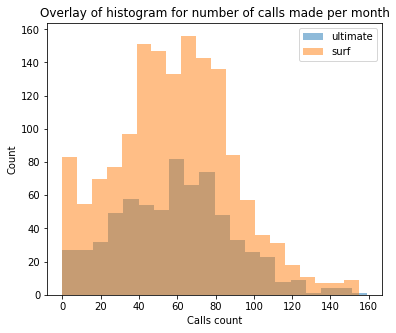

In [370]:
# histogram of number of calls per month
plt.figure(figsize=(6,5))
plt.hist(ultimate_plan_filtered['calls made'], bins=20, alpha=0.5, label='ultimate')
plt.hist(surf_plan_filtered['calls made'], bins=20, alpha=0.5, label='surf')

plt.xlabel('Calls count', size=10)
plt.ylabel('Count', size=10)
plt.title('Overlay of histogram for number of calls made per month')
plt.legend(loc='upper right');

We first plotted an overlay of histogram to visually compare the distribution of number of calls per month across plans. From the overlay of histogram plot, we can see that the `surf` plan had the most representation for the number of calls per month. 

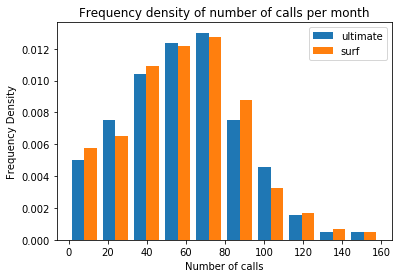

In [371]:
# density histogram showing frequency density of number of calls per month
plt.hist([ultimate_plan_filtered['calls made'], surf_plan_filtered['calls made']], label= ['ultimate', 'surf'], density = True)
plt.legend()
plt.ylabel('Frequency Density')
plt.xlabel('Number of calls')
plt.title('Frequency density of number of calls per month');

We compare the frequency density distribution of number of calls for each user per month in order to compare values across groups. We did this by plotting a grouped density histogram where multiple distributions are plotted in a single plot. Looking at the plot, the `surf` plan had the most number of calls per month than the `ultimate` plan. With the frequency density plot, we can see the number of calls made per users across phone plan. We can see at a glance that the `surf` plan has more number of calls than the `ultimate` plan.

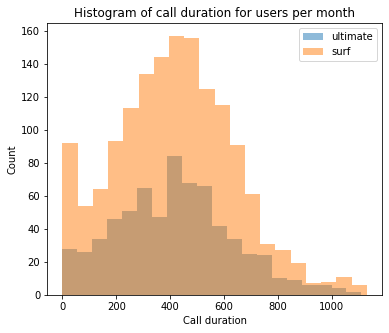

In [372]:
# histogram of call duration per month
plt.figure(figsize=(6,5))
plt.hist(ultimate_plan_filtered['call duration'], bins=20, alpha=0.5, label='ultimate')
plt.hist(surf_plan_filtered['call duration'], bins=20, alpha=0.5, label='surf')

plt.xlabel('Call duration', size=10)
plt.ylabel('Count', size=10)
plt.title('Histogram of call duration for users per month')
plt.legend(loc='upper right');

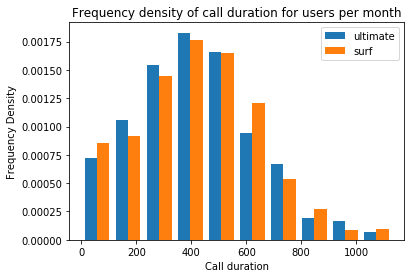

In [373]:
# density histogram showing frequency density of call duration per month
plt.hist([ultimate_plan_filtered['call duration'], surf_plan_filtered['call duration']], label= ['ultimate', 'surf'], density = True)
plt.legend()
plt.ylabel('Frequency Density')
plt.xlabel('Call duration')
plt.title('Frequency density of call duration for users per month');

**Conclusion:** From the overlay of histogram plot, we can see that `ultimate` plan has more call duration per month than users in the `surf` plan even though on the average users on the `surf` plan made more calls than users in the `ultimate` plan.

###### Find the messages the users of each plan send per month

In [374]:
# messages users of each plan send per month
agg_df.groupby('plan')['messages sent'].agg([np.mean, np.var, np.std])

,mean,var,std
plan,,,
surf,31.159568,1126.724522,33.566717
ultimate,37.551389,1208.756744,34.767179


What's the difference in average message sent for customers in the two plans?

In [375]:
# difference in average monthly messages sent
agg_df.groupby('plan')['messages sent']. describe()

,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,1573.0,31.159568,33.566717,0.0,3.0,24.0,47.0,266.0
ultimate,720.0,37.551389,34.767179,0.0,7.0,30.0,61.0,166.0


We can see that the users of the `ultimate` plan on the average sends more messages per month than users of the `surf` plan. Let's look at how this is distributed using the histogram plot.

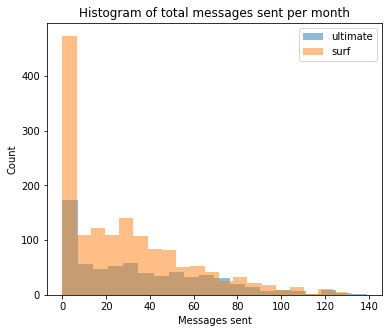

In [376]:
# histogram of messages sent each month
plt.figure(figsize=(6,5))
plt.hist(ultimate_plan_filtered['messages sent'], bins=20, alpha=0.5, label='ultimate')
plt.hist(surf_plan_filtered['messages sent'], bins=20, alpha=0.5, label='surf')

plt.xlabel('Messages sent', size=10)
plt.ylabel('Count', size=10)
plt.title('Histogram of total messages sent per month')
plt.legend(loc='upper right');

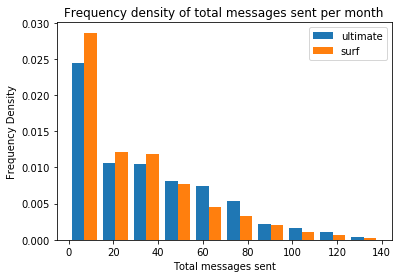

In [377]:
# density histogram showing frequency density of total messages sent each month
plt.hist([ultimate_plan_filtered['messages sent'], surf_plan_filtered['messages sent']], label= ['ultimate', 'surf'], density = True)
plt.legend()
plt.ylabel('Frequency Density')
plt.xlabel('Total messages sent')
plt.title('Frequency density of total messages sent per month');

**Conclusion:** From the overlay of the histogram showing the distribution of total messages sent per month, we can see that `surf` plan had the most total messages sent per month. In the corresponding frequency density plot, we can see that both plans had similar trend. The `surf` plan had more users than the `ultimate` plan. 

###### Find the volume of data the users of each plan require per month

In [378]:
# volume of data users of each plan use per month
agg_df.groupby('plan')['mb used'].agg([np.mean, np.var, np.std])

,mean,var,std
plan,,,
surf,17070.789574,6.457508e+07,8035.862417
ultimate,17722.311111,6.168830e+07,7854.190127


What's the difference in average message sent for customers in the two plans?

In [379]:
# difference in average monthly mb used
agg_df.groupby('plan')['mb used']. describe()

,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,1573.0,17070.789574,8035.862417,0.0,12288.0,17408.0,21504.0,71680.0
ultimate,720.0,17722.311111,7854.190127,0.0,13312.0,17408.0,21504.0,47104.0


We can see from the calculation above that on the average, users on the `ultimate` plan use up more data than users on the `surf` plan. Let's look at how this is distributed using the histogram plot and frquency distribution plot.

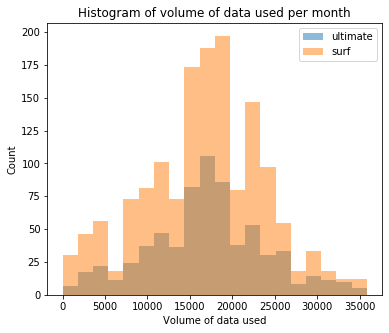

In [380]:
# histogram of volume of data used per month
plt.figure(figsize=(6,5))
plt.hist(ultimate_plan_filtered['mb used'], bins=20, alpha=0.5, label='ultimate')
plt.hist(surf_plan_filtered['mb used'], bins=20, alpha=0.5, label='surf')

plt.xlabel('Volume of data used', size=10)
plt.ylabel('Count', size=10)
plt.title('Histogram of volume of data used per month')
plt.legend(loc='upper right');

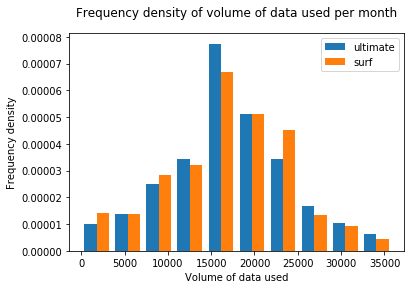

In [381]:
# density histogram showing frequency density of volume of data used per month
plt.hist([ultimate_plan_filtered['mb used'], surf_plan_filtered['mb used']], label= ['ultimate', 'surf'], density = True)
plt.legend()
plt.ylabel('Frequency density')
plt.xlabel('Volume of data used')
plt.title('Frequency density of volume of data used per month', y=1.05);

The histogram of volume of data required per users per month across plans shows that the `surf` plan had more users based on volume of data required per month. In the corresponding frequency density plot, we can see that both plan have the same trend except that `ultimate` has more values for volume of data used per month. 

In [382]:
# average revenue for users of ultimate and surf plan
ultimate_avg = ultimate_plan_filtered['revenue'].sum() / len(ultimate_plan_filtered['revenue'])
surf_avg = surf_plan_filtered['revenue'].sum() / len(surf_plan_filtered['revenue'])
diff = (ultimate_avg - surf_avg) / ultimate_avg * 100
print('The average revenue for users of the ultimate plan is ${:.2f}'.format(ultimate_avg))
print('The average revenue for users of the surf plan is ${:.2f}'.format(surf_avg))
print('Percentage difference between ultimate plan revenue and surf plan revenue is {:.2f}%'.format(diff))

The average revenue for users of the ultimate plan is $70.57
The average revenue for users of the surf plan is $55.50
Percentage difference between ultimate plan revenue and surf plan revenue is 21.35%


#### Conclusion

In this section, we calculated the statistics of our data. We determined that `ultimate` users on the average make 58 calls, use 418 minutes per month, sent about 34 messages, and use 16877 MB of data per month. We also computed statistics for `surf` users, and observed that on the average users make 58 calls, use 418 minutes per month, sent about 28 messages, and use 16553 MB of data per month. We plotted the distribution and the frequency density of the plans per user and observed that `surf` users have more representation overall than `ultimate` users. Also, on the average, `ultimate` users has more call duration per month, send more text messages, require more data volume than users in the `surf` plan. We also determined that users in the `ultimate` plan brought in more revenue on the average than users in the `surf` plan.

<div class="alert alert-success">
<b>Reviewer's comment</b>
<p>Nice analysis in this chapter! I like that you used appropriate style of plots and added the conclusions.</p> 
</div>

<div id="test_hypothesis">
    <h2>Test the hypothesis</h2> 
</div>

#### Test 1

*Null Hypothesis*: There is *no difference* between the average revenue from users of Ultimate and Surf calling plans.

We calculated the average revenue for users of Ultimate calling plan as USD70.57, and the average revenue for the surf plan as USD55.50. We want to know whether the difference between these numbers are significant? That depends on the variance of the samples the values are calculated from. Instead of basing our comparison on the mean alone, we use the data to perform a statistical test. In this experiment, the *null hypothesis* is that there is *no difference* between the average revenue from users of Ultimate and Surf calling plan. The *alternative* hypothesis is that the average revenue from users of Ultimate and Surf calling plans differs. We can carry out hypothesis testing to test the hypothesis. We use a significance level (or alpha) of 0.05, which means that only in 5% of the case will we reject the null hypothesis when it is true. We use a t-test to test the hypothesis because it is used to compare the means of two groups in order to determine whether two groups are different from one another. 

- $H_0$ (null hypothesis): average revenue per month for **ultimate** users = average revenue per month for **surf** users
- $H_1$ (alternative hypothesis): average revenue per month for **ultimate** users <> average revenue per month for **surf** users
- $\alpha$ = 0.05
- If p-value < $\alpha$, then reject null hypothesis. If p-value > $\alpha$, fail to reject null hypothesis.

In [383]:
# hypothesis testing
ultimate = ultimate_plan_filtered['revenue']
surf = surf_plan_filtered['revenue']

# set critical statistical significance level
alpha = 0.05

# test the hypothesis that the means of the two independent population are equal
results = st.ttest_ind(ultimate, surf, equal_var = False)
print('The p-value is: {}'.format(results.pvalue))

# compare the p-value with the significance level
if (results.pvalue < alpha):
    print('We reject the null hypohesis')
else:
    print('We fail to reject the null hypothesis')

The p-value is: 1.3114892927704795e-38
We reject the null hypohesis


#### Conclusion

We formulated the null hypothesis by stating that there is *no difference* between the average revenue from users of ultimate and surf calling plans. We used a significance level of 0.05. Since the p-value is less than 0.05, it means that the group are different hence **we reject the null hypothesis**. Our analysis suggest that average revenue from users of Ultimate and Surf calling plans differs. 

#### Test 2

*Null Hypothesis*: There is *no difference* between the average revenue from users in NY-NJ area and users from other regions.

*Alternative Hypothesis*: There is *a difference* between the average revenue from users in NY-NJ area and users from other regions. We carry out hypothesis testing to test the hypothesis. We use a significance level (or alpha) of 0.05, which means that only in 5% of the case will we reject the null hypothesis when it is true. We use a t-test to test the hypothesis because it is used to compare the means of two groups in order to determine whether two groups are different from one another.

- $H_0$ (null hypothesis): average revenue for users in NY-NJ areas = average revenue for users from other regions
- $H_1$ (alternative hypothesis): average revenue for users in NY-NJ areas <> average revenue for users from other regions
- $\alpha$ = 0.05
- If p-value < $\alpha$, then reject null hypothesis. If p-value > $\alpha$, fail to reject null hypothesis.

In [384]:
newyork_jersey = agg_df.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')['revenue'] # revenue of users in NY-NJ
not_newyork_jersey = agg_df.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')['revenue'] # revenue of users not in NY-NJ
print('The average revenue of users in New York-New Jersey area is ${:.2f}'.format(newyork_jersey.mean()))
print('The average revenue of users from other regions is ${:.2f}'.format(not_newyork_jersey.mean()))

The average revenue of users in New York-New Jersey area is $59.92
The average revenue of users from other regions is $65.22


We have determined the average revenue of users in New York-New Jersey area as USD59.92, and the average revenue of users from other regions as USD65.22. We want to know whether the difference between these number is significant? We set up a hypothesis test for significance using a significance level (or $\alpha$ values) of 0.05, which means that only in 5% of the case will we reject the null hypothesis when it is true. We use a t-test to test the hypothesis since it can be used to compare the means of two groups in order to determine whether the two groups are different from one another. The set is shown in the code below.

In [385]:
# hypothesis testing
newyork_jersey = agg_df.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')['revenue'] # revenue of users in NY-NJ
not_newyork_jersey = agg_df.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')['revenue'] # revenue of users not in NY-NJ

# set critical statistical significance level
alpha = 0.05

# test the hypothesis that the means of the two independent population are equal
results = st.ttest_ind(newyork_jersey, not_newyork_jersey, equal_var = False)
print('The p-value is: {}'.format(results.pvalue))

# compare the p-value with the significance level
if (results.pvalue < alpha):
    print('We reject the null hypohesis')
else:
    print('We fail to reject the null hypothesis')

The p-value is: 0.03352561588530057
We reject the null hypohesis


#### Conclusion

We formulated our null hypothesis by stating that there is *no difference* between the average revenue from users in New York-New Jersey area, and users from other region. We used a t-test to test the hypothesis using a significance level of 0.05. Since the p-value is less than 0.05, it means that the group are different hence **we reject the null hypothesis**. We may not know the size of the difference between the average revenue from users in New York-New Jersey area, and users from other regions. All the test tells us is that they are different. However, by calculating the average number for revenue from users in both groups, we can say with certainty that the mean of the revenue between the two groups are significantly different. 

<div class="alert alert-success">
<b>Reviewer's comment</b>
<p>The implementation of tests is correct (good that you didn't forget equal_var=False), but the conclusions will change after you correct the inputs to be monthly revenues instead of total revenues by user.</p> 
</div>

<div id="overall_conclusion">
    <h2>Overall conclusion</h2> 
</div>

By looking at the general information of the data, we identified some errors like problem with the datatype and corrected them by converting datatype to the right format. We analyzed the data by carrying out exploratory data analysis and found that the distribution of the data is slightly **skewed to the right**. We detected and removed some outliers from the data, and used the filtered data to compute the statistics. We determined that `ultimate` users on the average make 58 calls, use 418 minutes per month, sent about 34 messages, and use 16877 MB of data per month. We also computed statistics for `surf` users, and observed that on the average users make 58 calls, use 418 minutes per month, sent about 28 messages, and use 16553 MB of data per month. 

We plotted the distribution and the frequency density of the plans per user and observed that `surf` users have more call count overall than `ultimate` users. Also, on the average, `ultimate` users has more call duration per month, send more text messages, require more data volume than users in the `surf` plan. We also determined that users in the `ultimate` plan brought in more revenue on the average than users in the `surf` plan. We also determined that `ultimate` users brought in more revenue on the average since the average revenue for users in the `ultimate` plan is $\approx$ 21.4% greater than users in the `surf` plan. The calculated average revenue for users of `ultimate` calling plan is \$70.57, while the average revenue for the `surf` plan as \$55.50.

We formulated the null hypothesis by stating that there is *no difference* between the average revenue from users of `ultimate` and `surf` calling plans. We used a significance level of 0.05 to calculate the p-value. From the hypothesis test, we determined that the group are different hence we reject the null hypothesis. The test suggested that average revenue from users of Ultimate and Surf calling plans differs. We also tested the hypothesis by stating that there is *no difference* between the average revenue from users in New York-New Jersey area, and users from other region. Our hypothesis test shows that the average revenue from users in New York-New Jersey area, and users from other region are different.

We can conclude from this analysis that:
- users on the `ultimate` plan has more call duration per month, send more text messages, require more data volume, and brings in more average revenue than users on the `surf` plan.
- users on the `surf` plan on the average make more calls than users on the `ultimate` plan.
- the average revenue from users in other regions is greater than revenue from users in the New York-New Jersey area.
- the commercial department should adjust advertising budget and advertise more calls, messaging and internet data offers to the user in the `ultimate` plan. 
- the commercial department should invest in more advertisements in other regions since Megaline makes more money in that area than the New York-New Jersey area .
- the `ultimate` plan is more profitable than the `surf` plan even though the `surf` plan has more users overall than the `ultimate` plan.

We could carry out further analysis to determine the average revenue by age group. That will also inform Megaline telecom on which age group and advertising medium to target for marketing purposes. For instance, if we analyze that people in the age group 1 - 25 brings in more revenue, we can also determine whether marketing on social media apps like TikTok or Instagram will bring in more users and revenue than TV or billboard advertisement. 

<div class="alert alert-success">
<b>Reviewer's comment</b>
<p>This is a perfect format for the conclusion 👍</p>
<p>If you want, you can add additional structure to make it more clear which paragraph refers to which part of the reseach.</p>
</div>